# Multiple linear regression demo

Load packages we will use

In [2]:
# math 
import numpy as np

# dataframes
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# linear regression two ways
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# for choosing covariates to include in model
from patsy import dmatrices 

# Electricity usage example

In [3]:
usage = pd.read_csv('data/elec_usage.txt')
usage.head()

,month,year,usage,temperature
0,8,1989,24.828,73
1,9,1989,24.688,67
2,10,1989,19.310,57
3,11,1989,59.706,43
4,12,1989,99.667,26


<AxesSubplot:xlabel='month', ylabel='Count'>

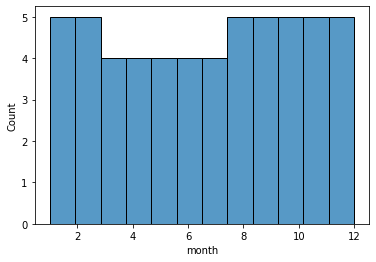

In [4]:
sns.histplot(usage['month'], bins=12)

<AxesSubplot:xlabel='temperature', ylabel='usage'>

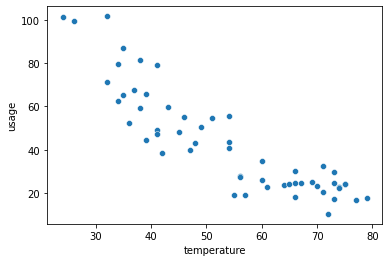

In [5]:
sns.scatterplot(x='temperature', y='usage', data=usage)

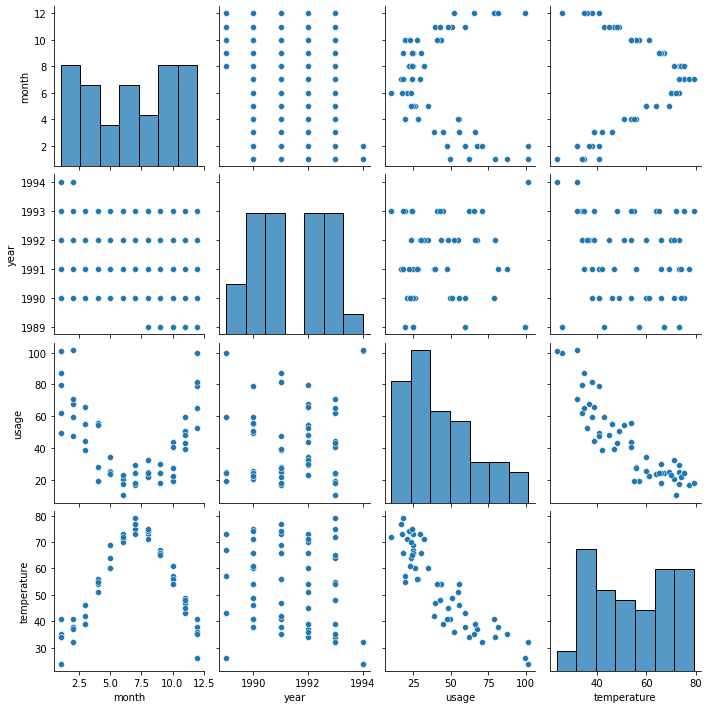

In [6]:
sns.pairplot(usage)

# Fit a linear model to predict electricity usage

In [7]:
# Collect data into *design matrix* X and *target vector* y
features = ['temperature', 'month']
target = 'usage'

X = usage[features] # the design matrix
Y = usage[target]   # the target vector
X.head() 

,temperature,month
0,73,8
1,67,9
2,57,10
3,43,11
4,26,12


In [9]:
X = sm.add_constant(X)
X.head()

,const,temperature,month
0,1.0,73,8
1,1.0,67,9
2,1.0,57,10
3,1.0,43,11
4,1.0,26,12


In [12]:
# Fit the model with statsmodels
model = sm.OLS(Y, X).fit()
Yhat = model.predict(X) # make the predictions by the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  usage   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     92.46
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           7.53e-18
Time:                        06:54:41   Log-Likelihood:                -210.65
No. Observations:                  55   AIC:                             427.3
Df Residuals:                      52   BIC:                             433.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         116.8641      5.841     20.006      0.000     105.142     128.586
temperature    -1.3622      0.104    -13.150      0.000      -1.570      -1.154
month          -0.0415      0.450     -0.092      0.927      -0.944       0.861
==============================================================================
Omnibus:                        0.294   Durbin-Watson:                   1.220
Prob(Omnibus):                  0.863   Jarque-Bera (JB):                0.465
Skew:                           0.128   Prob(JB):                        0.792
Kurtosis:                       2.630   Cond. No.                         213.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='temperature', ylabel='usage'>

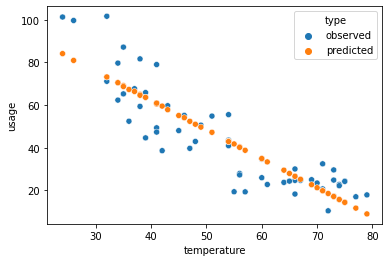

In [11]:
# plot observed vs predicted usage as a function of temperature
usage['predicted'] = Yhat
usage_by_temp = usage[['temperature', 'usage', 'predicted']]
usage_by_temp = usage_by_temp.rename(columns={'usage': 'observed'})
usage_by_temp = usage_by_temp.melt(id_vars='temperature')
usage_by_temp = usage_by_temp.rename(columns={'variable': 'type'})
usage_by_temp = usage_by_temp.rename(columns={'value': 'usage'})
sns.scatterplot(x='temperature', y='usage', hue='type', data=usage_by_temp)

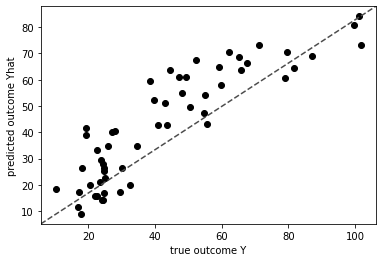

In [13]:
# Plot quality of fit by comparing observed vs predicted usage
plt.scatter(Y, Yhat,  color='black')
plt.xlabel("true outcome Y")
plt.ylabel("predicted outcome Yhat")

# add the line y=x
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, ls="--", c=".3")

plt.show()

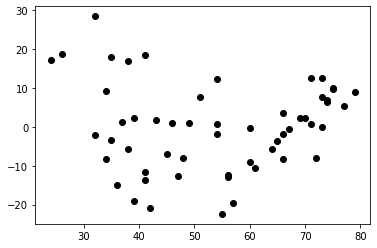

In [16]:
# are residuals iid?
plt.scatter(usage['temperature'], model.resid,  color='black')

<AxesSubplot:ylabel='Count'>

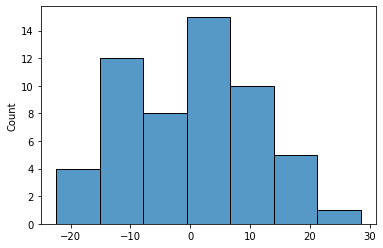

In [17]:
# are residuals normal?
sns.histplot(model.resid)

# Improving the model

* add a constant to the model
* add more nonlinear features to the model

In [25]:
# add a constant to X, then refit the model
X = sm.add_constant(X)
X.head()

,const,temperature,month
0,1.0,73,8
1,1.0,67,9
2,1.0,57,10
3,1.0,43,11
4,1.0,26,12


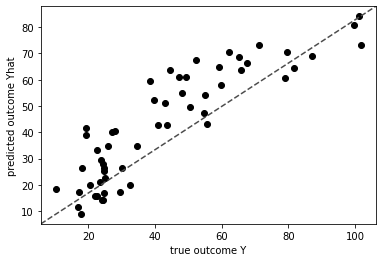

In [28]:
# Fit the model with statsmodels
model = sm.OLS(Y, X).fit()
Yhat = model.predict(X) # make the predictions by the model

# Plot outputs
plt.scatter(Y, Yhat,  color='black')
plt.xlabel("true outcome Y")
plt.ylabel("predicted outcome Yhat")

# add the line y=x
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, ls="--", c=".3")

plt.show()

In [45]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  usage   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     70.68
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           5.88e-20
Time:                        11:49:25   Log-Likelihood:                -200.23
No. Observations:                  55   AIC:                             410.5
Df Residuals:                      50   BIC:                             420.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
month        1540.6865   2004.110      0.769      0.446   -2484.686    5566.059
year         1.848e+04    2.4e+04      0.769      0.446   -2.98e+04    6.68e+04
temperature    -4.8254      0.727     -6.634      0.000      -6.286      -3.364
tempsqr         0.0323      0.007      4.798      0.000       0.019       0.046
yearcts     -1.849e+04   2.41e+04     -0.769      0.446   -6.68e+04    2.98e+04
==============================================================================
Omnibus:                        1.794   Durbin-Watson:                   1.170
Prob(Omnibus):                  0.408   Jarque-Bera (JB):                1.342
Skew:                           0.382   Prob(JB):                        0.511
Kurtosis:                       3.046   Cond. No.                     1.15e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Add more features!

In [29]:
# add two more predictors: nonlinear functions of original variables
usage['tempsqr'] = usage['temperature']**2
usage['yearcts'] = usage['year'] + (usage['month']-1)/12
usage.head()

,month,year,usage,temperature,tempsqr,yearcts
0,8,1989,24.828,73,5329,1989.583333
1,9,1989,24.688,67,4489,1989.666667
2,10,1989,19.310,57,3249,1989.750000
3,11,1989,59.706,43,1849,1989.833333
4,12,1989,99.667,26,676,1989.916667


In [30]:
variables = list(usage.columns)
variables

['month', 'year', 'usage', 'temperature', 'tempsqr', 'yearcts']

In [31]:
features = variables[0:2] + variables[3:]
features

['month', 'year', 'temperature', 'tempsqr', 'yearcts']

In [33]:
X = usage[features] # the design matrix
X.head() 

,month,year,temperature,tempsqr,yearcts
0,8,1989,73,5329,1989.583333
1,9,1989,67,4489,1989.666667
2,10,1989,57,3249,1989.750000
3,11,1989,43,1849,1989.833333
4,12,1989,26,676,1989.916667


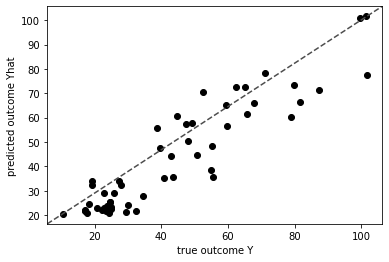

In [34]:
# Fit the model with statsmodels
model = sm.OLS(Y, X).fit()
Yhat = model.predict(X) # make the predictions by the model

# Plot outputs
plt.scatter(Y, Yhat,  color='black')
plt.xlabel("true outcome Y")
plt.ylabel("predicted outcome Yhat")

# add the line y=x
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, ls="--", c=".3")

plt.show()

In [14]:
# more concise way of collecting data
Y, X = dmatrices('usage ~ 1 + temperature + np.power(temperature, 2)', data=usage, return_type='dataframe')
X.head()

,Intercept,temperature,"np.power(temperature, 2)"
0,1.0,73.0,5329.0
1,1.0,67.0,4489.0
2,1.0,57.0,3249.0
3,1.0,43.0,1849.0
4,1.0,26.0,676.0


In [88]:
# fit a least squares model
model = sm.OLS(Y, X).fit()
Yhat = model.predict(X) # make the predictions by the model

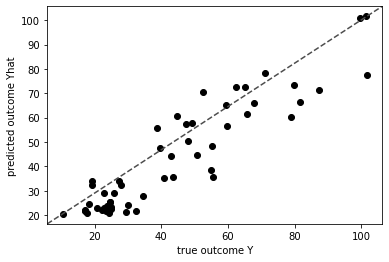

In [44]:
# Plot outputs
plt.scatter(Y, Yhat,  color='black')
plt.xlabel("true outcome Y")
plt.ylabel("predicted outcome Yhat")

# add the line y=x
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, ls="--", c=".3")

plt.show()

In [91]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  usage   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     143.8
Date:                Thu, 09 Apr 2020   Prob (F-statistic):           6.47e-22
Time:                        10:55:43   Log-Likelihood:                -200.75
No. Observations:                  55   AIC:                             407.5
Df Residuals:                      52   BIC:                             413.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  196.7153     17.488     11.249      0.000     161.624     231.807
temperature                 -4.6405      0.695     -6.678      0.000      -6.035      -3.246
np.power(temperature, 2)     0.0307      0.006      4.749      0.000       0.018       0.044
==============================================================================
Omnibus:                        1.155   Durbin-Watson:                   1.166
Prob(Omnibus):                  0.561   Jarque-Bera (JB):                0.888
Skew:                           0.310   Prob(JB):                        0.642
Kurtosis:                       2.955   Cond. No.                     4.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

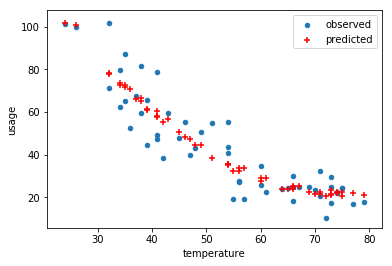

In [27]:
# plot observed vs predicted usage as a function of temperature
p = usage.plot.scatter(x='temperature', y='usage', label='observed')
p.scatter(x=usage['temperature'], y=Yhat, color='r', marker="+", label='predicted')
plt.legend()

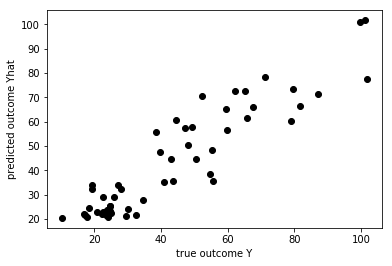

In [28]:
# let's make a function to plot predictions against truth
def plot_fit(Y, Yhat):
    plt.scatter(Y, Yhat,  color='black')
    plt.xlabel("true outcome Y")
    plt.ylabel("predicted outcome Yhat")
    plt.show()
    
plot_fit(Y, Yhat)

In [63]:
# we could even make a function to help us visually search for a good model 

def assess_model_quality(data, formula):
    Y, X = dmatrices(formula, data=data, return_type='dataframe')
    model = sm.OLS(Y, X).fit()
    Yhat = model.predict(X)
    plot_fit(Y, Yhat)
    return model.summary()
    
assess_model_quality(usage, 'usage ~ 1 + temperature + np.power(temperature, 2) + np.power(temperature, 3)')

NameError: name 'plot_fit' is not defined

# What do p-values mean?

In [47]:
n = 20
x = np.random.randn(n)
eps = np.random.randn(n)
y = eps
model = sm.OLS(y, x).fit()

In [48]:
model.pvalues

array([0.2426073])

In [49]:
pvalues = []
for i in range(1000):
    n = 20
    y = np.random.randn(n)
    x = np.random.randn(n)
    model = sm.OLS(y, x).fit()
    pvalues.append(model.pvalues[0])

<AxesSubplot:ylabel='Count'>

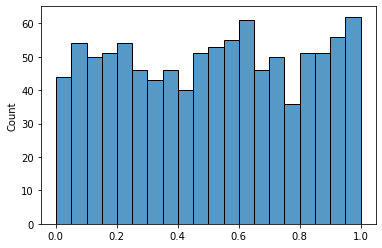

In [52]:
sns.histplot(pvalues, bins=20)

In [53]:
# around 5% of the pvalues are <.05, just by random chance 
sum(np.array(pvalues) <= .05) / len(pvalues)

0.043

# Model selection and p values: be careful!

In [54]:
df = pd.DataFrame()
n = 500
p = 100
for j in range(p):
    xp = 'x'+str(j)
    df[xp] = np.random.randn(n)
y = np.random.randn(n)
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,2.623254,-0.802040,0.054528,0.573241,-0.710244,0.263384,0.463138,0.115483,1.025473,0.101865,...,-0.255342,-1.394777,0.328260,0.810497,-0.899081,-0.081717,2.535730,0.141986,1.472458,-1.118727
1,-1.239898,0.918592,1.607867,0.316869,1.874751,0.843463,-0.878260,0.068491,-0.365059,0.492198,...,1.481027,-1.323337,-0.158361,-0.822766,0.885847,-0.532316,0.463486,-0.069008,-0.625216,-1.073474
2,0.542683,0.039553,1.184619,-0.178273,-1.081759,0.507279,-0.084141,-0.379923,0.552498,-0.243260,...,0.289320,-1.063214,-0.554801,-0.781533,0.638503,-0.673263,-0.599241,-0.640939,-1.222104,-1.537310
3,-0.094054,1.381927,0.153574,1.023250,0.045597,0.103349,-0.032535,0.506236,-1.114935,0.029036,...,0.812528,-0.664168,0.420198,0.433262,-1.624309,0.285201,0.451823,1.204218,-0.014775,-2.143995
4,-0.887388,0.809840,0.236358,1.134181,-0.310011,-1.310849,0.758173,2.401749,-0.895524,-0.564146,...,-1.689074,-0.210007,0.108338,0.867975,1.146043,0.665636,-1.200726,1.710236,-1.253896,-0.001382


In [55]:
variables = df.columns
model = sm.OLS(y,df[variables]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.247
Model:                            OLS   Adj. R-squared (uncentered):              0.059
Method:                 Least Squares   F-statistic:                              1.314
Date:                Mon, 13 Mar 2023   Prob (F-statistic):                      0.0358
Time:                        11:50:03   Log-Likelihood:                         -657.03
No. Observations:                 500   AIC:                                      1514.
Df Residuals:                     400   BIC:                                      1936.
Df Model:                         100                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x0             0.0370      0.048      0.772      0.441      -0.057       0.131
x1            -0.0050      0.046     -0.109      0.913      -0.095       0.085
x2             0.0580      0.048      1.210      0.227      -0.036       0.152
x3            -0.0524      0.051     -1.021      0.308      -0.153       0.049
x4            -0.0281      0.049     -0.575      0.565      -0.124       0.068
x5            -0.0510      0.051     -0.998      0.319      -0.151       0.049
x6             0.0118      0.048      0.247      0.805      -0.082       0.106
x7             0.1151      0.053      2.159      0.031       0.010       0.220
x8             0.0896      0.049      1.842      0.066      -0.006       0.185
x9             0.0055      0.052      0.108      0.914      -0.096       0.107
x10            0.0225      0.051      0.442      0.658      -0.077       0.122
x11           -0.0968      0.051     -1.889      0.060      -0.198       0.004
x12            0.0328      0.051      0.646      0.519      -0.067       0.133
x13           -0.0364      0.053     -0.687      0.493      -0.141       0.068
x14           -0.0349      0.049     -0.709      0.479      -0.132       0.062
x15            0.0124      0.053      0.236      0.814      -0.091       0.116
x16           -0.0179      0.048     -0.371      0.711      -0.113       0.077
x17           -0.0707      0.051     -1.395      0.164      -0.170       0.029
x18            0.0314      0.051      0.615      0.539      -0.069       0.132
x19            0.0646      0.050      1.294      0.197      -0.034       0.163
x20            0.0120      0.051      0.236      0.814      -0.088       0.112
x21            0.0360      0.051      0.704      0.482      -0.064       0.136
x22           -0.0141      0.050     -0.280      0.780      -0.113       0.085
x23           -0.0211      0.052     -0.405      0.686      -0.124       0.081
x24           -0.0580      0.047     -1.232      0.219      -0.151       0.035
x25           -0.0819      0.051     -1.611      0.108      -0.182       0.018
x26           -0.0464      0.050     -0.919      0.359      -0.146       0.053
x27           -0.0404      0.047     -0.857      0.392      -0.133       0.052
x28           -0.1400      0.048     -2.905      0.004      -0.235      -0.045
x29            0.0075      0.049      0.152      0.879      -0.089       0.104
x30           -0.0691      0.050     -1.374      0.170      -0.168       0.030
x31           -0.0377      0.050     -0.761      0.447      -0.135       0.060
x32           -0.0472      0.050     -0.950      0.343      -0.145       0.050
x33           -0.0776      0.053     -1.451      0.148      -0.183       0.028
x34            0.0392      0.050      0.786      0.432      -

In [56]:
# uncomment this line the first time you run the cell; comment it out for subsequent runs
stat_sig_vars = variables
stat_sig_vars = stat_sig_vars[model.pvalues <= .05]
model = sm.OLS(y,df[stat_sig_vars]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.070
Model:                            OLS   Adj. R-squared (uncentered):              0.057
Method:                 Least Squares   F-statistic:                              5.294
Date:                Mon, 13 Mar 2023   Prob (F-statistic):                    7.54e-06
Time:                        11:50:03   Log-Likelihood:                         -709.91
No. Observations:                 500   AIC:                                      1434.
Df Residuals:                     493   BIC:                                      1463.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x7             0.0784      0.047      1.656      0.098      -0.015       0.171
x28           -0.1576      0.044     -3.591      0.000      -0.244      -0.071
x41            0.1123      0.047      2.406      0.016       0.021       0.204
x52            0.1051      0.045      2.317      0.021       0.016       0.194
x62           -0.0843      0.046     -1.843      0.066      -0.174       0.006
x67            0.1131      0.048      2.333      0.020       0.018       0.208
x83           -0.0809      0.046     -1.767      0.078      -0.171       0.009
==============================================================================
Omnibus:                        0.627   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.731   Jarque-Bera (JB):                0.481
Skew:                          -0.064   Prob(JB):                        0.786
Kurtosis:                       3.082   Cond. No.                         1.26
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Now let's fit the same model, using sklearn

In [57]:
lm = LinearRegression()
model = lm.fit(X,Y)
model

LinearRegression()

In [58]:
Yhat = lm.predict(X)
Yhat[:5]

array([ 23.43680686,  25.50676803,  33.97277473,  56.57815002,
       100.98360633])

In [59]:
# how well does the model fit? 
lm.score(X,Y) # R^2 score

0.8497213568380633

In [60]:
# what about the coefficients?
lm.coef_

array([ 0.24639928, -0.34673328, -4.82539599,  0.03226385, -0.32620001])

In [61]:
# and the intercept β_0
lm.intercept_

1540.4400710617704

In [62]:
# and visualize the fit 
plot_fit(Y, Yhat)

NameError: name 'plot_fit' is not defined